In [2]:
import pandas as pd
import os
import sys
import pathlib as Path
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast
import re
from collections import Counter

# Add project root to Python path
project_root = '/Users/ahmetyusufyuksek/Documents/GitHub/Sufism-and-Urban-Religiosity'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils.occupation_standardization import standardization_map


In [3]:
file_path = os.path.join(project_root, 'data', 'sicil_records.csv')
df = pd.read_csv(file_path)

In [4]:
df['case_text_summary'] = "Summary: " + df['case_summary'].astype(str) + "\n" + "Case: " + df['case_text'].astype(str)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

num_courts = df['court_title'].nunique()

# Number of registers per court
registers_per_court = df.groupby('court_title')['sicil_number'].nunique()

# Number of case entries per court
case_entries_per_court = df.groupby('court_title').size()

# Total counts
total_cases = case_entries_per_court.sum()
total_registers = registers_per_court.sum()
# Print summary statistics
print("=" * 80)
print("COURT RECORDS SUMMARY")
print("=" * 80)
print(f"Number of different courts: {num_courts}")
print(f"Total registers: {total_registers}")
print(f"Total case entries: {total_cases}")
print(f"Average registers per court: {total_registers/num_courts:.1f}")
print(f"Average cases per court: {total_cases/num_courts:.1f}")
print()
# Sort by number of cases (descending)
case_entries_sorted = case_entries_per_court.sort_values(ascending=False)
registers_sorted = registers_per_court.sort_values(ascending=False)

print("\nTop 10 Courts by Number of Cases:")
for i, (court, count) in enumerate(case_entries_sorted.head(10).items(), 1):
    print(f"{i:2d}. {court:45s}: {count:>6,} cases")

print("\nTop 10 Courts by Number of Registers:")
for i, (court, count) in enumerate(registers_sorted.head(10).items(), 1):
    print(f"{i:2d}. {court:45s}: {count:>4,} registers")

COURT RECORDS SUMMARY
Number of different courts: 24
Total registers: 100
Total case entries: 54670
Average registers per court: 4.2
Average cases per court: 2277.9


Top 10 Courts by Number of Cases:
 1. İstanbul Mahkemesi                           : 12,348 cases
 2. Üsküdar Mahkemesi                            : 11,038 cases
 3. Bab Mahkemesi                                :  7,245 cases
 4. Galata Mahkemesi                             :  4,895 cases
 5. Eyüb Mahkemesi (Havass-ı Refia)              :  3,718 cases
 6. Rumeli Sadâreti Mahkemesi                    :  2,833 cases
 7. Eyüp Mahkemesi                               :  1,862 cases
 8. Kısmet-i Askeriye Mahkemesi                  :  1,293 cases
 9. Hasköy Mahkemesi                             :  1,190 cases
10. Balat Mahkemesi                              :  1,115 cases

Top 10 Courts by Number of Registers:
 1. İstanbul Mahkemesi                           :   24 registers
 2. Üsküdar Mahkemesi                            :   1

In [15]:
# Perform the specified changes in the DataFrame
df.loc[df['court_title'] == 'Evkaf Muhasebesi1', 'court_title'] = 'Evkaf Muhasebesi'
df.loc[df['court_title'] == 'Eyüb', 'court_title'] = 'Eyüp'
df.loc[df['court_title'] == 'Rumeli Sadâreti', 'court_title'] = 'Rumeli Sadareti'
df.loc[df['court_title'] == 'Evkaf-ı Hümâyûn', 'court_title'] = 'Evkaf Mahkemesi'
df.loc[df['court_title'] == 'Evkaf-ı HümâyûnMüfettişliği', 'court_title'] = 'Evkaf Müfettişliği'
df.loc[df['court_title'] == 'Evkaf Müfettişliği', 'sicil_number'] = 1  # Changed '1' to 1
df.loc[df['court_title'] == 'Evkaf Muhasebesi', 'sicil_number'] = 1   # Changed '1' to 1
df.loc[df['court_title'] == 'Evkaf Mahkemesi', 'sicil_number'] = 673  # Changed '673' to 673

/var/folders/54/1bt1zb4n7h7grgv919nm_0c00000gn/T/ipykernel_41018/443811409.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  periodic_register_counts = df.groupby('period')['sicil_number'].nunique()
/var/folders/54/1bt1zb4n7h7grgv919nm_0c00000gn/T/ipykernel_41018/443811409.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  periodic_entry_counts = df.groupby('period').size()


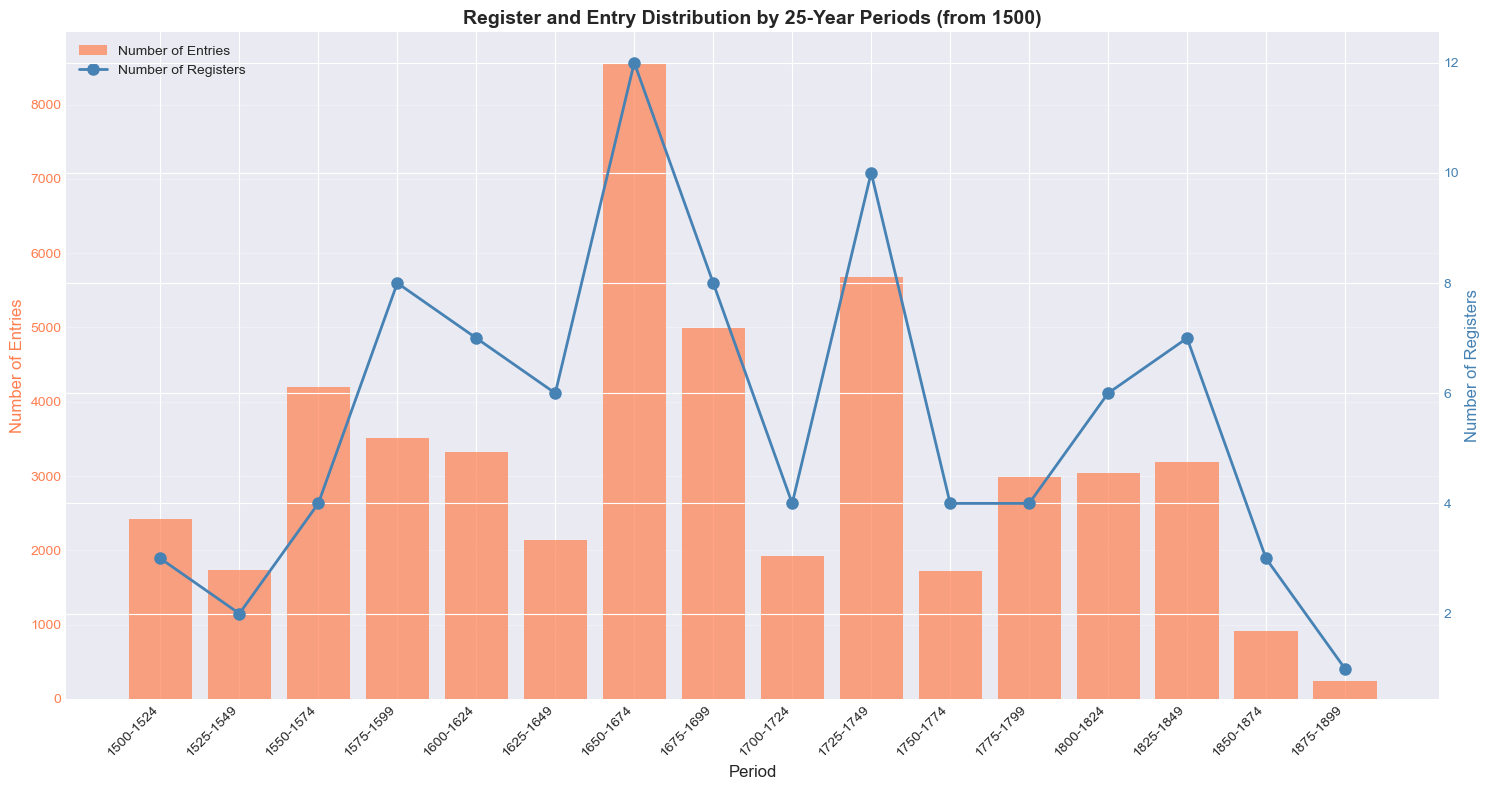


Summary by Period:
1500-1524:   3 registers,  2,416 entries
1525-1549:   2 registers,  1,730 entries
1550-1574:   4 registers,  4,193 entries
1575-1599:   8 registers,  3,507 entries
1600-1624:   7 registers,  3,325 entries
1625-1649:   6 registers,  2,135 entries
1650-1674:  12 registers,  8,545 entries
1675-1699:   8 registers,  4,997 entries
1700-1724:   4 registers,  1,924 entries
1725-1749:  10 registers,  5,683 entries
1750-1774:   4 registers,  1,726 entries
1775-1799:   4 registers,  2,987 entries
1800-1824:   6 registers,  3,048 entries
1825-1849:   7 registers,  3,186 entries
1850-1874:   3 registers,    921 entries
1875-1899:   1 registers,    239 entries


In [23]:
# Remove NaN values
df = df.dropna(subset=['year'])

# Create 25-year periods starting from 1500
bins = range(1500, int(df['year'].max()) + 25, 25)
labels = [f"{start}-{start+24}" for start in bins[:-1]]
df['period'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Count unique registers per 25-year period
periodic_register_counts = df.groupby('period')['sicil_number'].nunique()

# Count total case entries per 25-year period
periodic_entry_counts = df.groupby('period').size()

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(15, 8))

# Set x positions
x = range(len(periodic_register_counts))

# Plot entries on primary y-axis (left)
color1 = 'coral'
ax1.set_xlabel('Period', fontsize=12)
ax1.set_ylabel('Number of Entries', fontsize=12, color=color1)
bars1 = ax1.bar(x, periodic_entry_counts.values, alpha=0.7, 
                label='Number of Entries', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(x)
ax1.set_xticklabels(periodic_register_counts.index, rotation=45, ha='right')

# Create secondary y-axis for registers (right)
ax2 = ax1.twinx()
color2 = 'steelblue'
ax2.set_ylabel('Number of Registers', fontsize=12, color=color2)
ax2.plot(x, periodic_register_counts.values, color=color2, marker='o', 
         linewidth=2, markersize=8, label='Number of Registers')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and grid
ax1.set_title('Register and Entry Distribution by 25-Year Periods (from 1500)', 
              fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('temporal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary
print("\nSummary by Period:")
print("="*60)
for period in periodic_register_counts.index:
    registers = periodic_register_counts[period]
    entries = periodic_entry_counts[period]
    print(f"{period}: {registers:>3} registers, {entries:>6,} entries")

In [63]:
# Path to results folder
path = 'results'

# Get all CSV files
all_files = glob.glob(os.path.join(path, "*.csv"))

# ⚠️ Exclude ALL combined/merged files
all_files = [f for f in all_files if not any(keyword in os.path.basename(f).lower() 
             for keyword in ['combined', 'birlestirilmis', 'merged', 'ner_results'])]

print(f"{len(all_files)} CSV files found (excluding combined files)")
print("=" * 60)

# Load files
dfs = []
for i, file in enumerate(all_files, 1):
    try:
        df_temp = pd.read_csv(file)
        df_temp['source_file'] = os.path.basename(file)
        dfs.append(df_temp)
        print(f"{i}. Loaded: {os.path.basename(file)} - Shape: {df_temp.shape}")
    except Exception as e:
        print(f"❌ Error - {os.path.basename(file)}: {e}")

print(f"\nTotal {len(dfs)} files loaded")

# Combine
combined_df = pd.concat(dfs, ignore_index=True)

# Remove any remaining duplicates
combined_df = combined_df.drop_duplicates()

print(f"\n📊 FINAL DATASET")
print(f"  Total rows: {len(combined_df):,}")
print(f"  Unique cases: {combined_df['case_unique_id'].nunique():,}")

# Person records
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'].notna()) &
    (combined_df['name'] != 'N/A')
].copy()

print(f"\n  Person records: {len(persons_df):,}")
print(f"  Unique person_id: {persons_df['person_id'].nunique():,}")

48 CSV files found (excluding combined files)
1. Loaded: Beşiktaş Mahkemesi_2.csv - Shape: (7633, 17)
2. Loaded: İstanbul Mahkemesi_3.csv - Shape: (11005, 17)
3. Loaded: Eyüb Mahkemesi (Havass-ı Refia)_37.csv - Shape: (10417, 17)
4. Loaded: Balat Mahkemesi_2.csv - Shape: (7976, 17)
5. Loaded: Üsküdar Mahkemesi_51.csv - Shape: (9111, 17)
6. Loaded: Galata Mahkemesi_65.csv - Shape: (4745, 17)
7. Loaded: Balat Mahkemesi_1.csv - Shape: (6682, 17)
8. Loaded: Bab Mahkemesi_11.csv - Shape: (10232, 17)
9. Loaded: Hasköy Mahkemesi_10.csv - Shape: (3396, 17)
10. Loaded: İstanbul Mahkemesi_191.csv - Shape: (2474, 17)
11. Loaded: Eyüb Mahkemesi (Havass-ı Refia)_3.csv - Shape: (4854, 17)
12. Loaded: Eyüb Mahkemesi (Havass-ı Refia)_19.csv - Shape: (11380, 17)
13. Loaded: Üsküdar Mahkemesi_56.csv - Shape: (4952, 17)
14. Loaded: Bab Mahkemesi_46 .csv - Shape: (12940, 17)
15. Loaded: Tophane Mahkemesi_2.csv - Shape: (6682, 17)
16. Loaded: Evkaf Muhasebesi_1.csv - Shape: (5942, 17)
17. Loaded: Rumeli 

In [65]:
# Path to results folder
path = 'results'

# Get all CSV files
all_files = glob.glob(os.path.join(path, "*.csv"))

# ⚠️ Exclude combined files but KEEP ner_results_istanbul18
all_files = [f for f in all_files if not any(keyword in os.path.basename(f).lower() 
             for keyword in ['combined', 'birlestirilmis', 'merged'])]

print(f"{len(all_files)} CSV files found (excluding combined files)")
print("=" * 60)

# Load files
dfs = []
for i, file in enumerate(all_files, 1):
    try:
        df_temp = pd.read_csv(file)
        df_temp['source_file'] = os.path.basename(file)
        dfs.append(df_temp)
        print(f"{i}. Loaded: {os.path.basename(file)} - Shape: {df_temp.shape}")
    except Exception as e:
        print(f"❌ Error - {os.path.basename(file)}: {e}")

print(f"\nTotal {len(dfs)} files loaded")

# Combine
combined_df = pd.concat(dfs, ignore_index=True)

# Remove any remaining duplicates
combined_df = combined_df.drop_duplicates()

print(f"\n📊 FINAL DATASET")
print(f"  Total rows: {len(combined_df):,}")
print(f"  Unique cases: {combined_df['case_unique_id'].nunique():,}")

# Person records
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'].notna()) &
    (combined_df['name'] != 'N/A')
].copy()

print(f"\n  Person records: {len(persons_df):,}")
print(f"  Unique person_id: {persons_df['person_id'].nunique():,}")

49 CSV files found (excluding combined files)
1. Loaded: Beşiktaş Mahkemesi_2.csv - Shape: (7633, 17)
2. Loaded: İstanbul Mahkemesi_3.csv - Shape: (11005, 17)
3. Loaded: Eyüb Mahkemesi (Havass-ı Refia)_37.csv - Shape: (10417, 17)
4. Loaded: Balat Mahkemesi_2.csv - Shape: (7976, 17)
5. Loaded: Üsküdar Mahkemesi_51.csv - Shape: (9111, 17)
6. Loaded: ner_results_istanbul18.csv - Shape: (13752, 17)
7. Loaded: Galata Mahkemesi_65.csv - Shape: (4745, 17)
8. Loaded: Balat Mahkemesi_1.csv - Shape: (6682, 17)
9. Loaded: Bab Mahkemesi_11.csv - Shape: (10232, 17)
10. Loaded: Hasköy Mahkemesi_10.csv - Shape: (3396, 17)
11. Loaded: İstanbul Mahkemesi_191.csv - Shape: (2474, 17)
12. Loaded: Eyüb Mahkemesi (Havass-ı Refia)_3.csv - Shape: (4854, 17)
13. Loaded: Eyüb Mahkemesi (Havass-ı Refia)_19.csv - Shape: (11380, 17)
14. Loaded: Üsküdar Mahkemesi_56.csv - Shape: (4952, 17)
15. Loaded: Bab Mahkemesi_46 .csv - Shape: (12940, 17)
16. Loaded: Tophane Mahkemesi_2.csv - Shape: (6682, 17)
17. Loaded: Ev

In [66]:
# Kişiler - person_id dolu olanlar (her satır bir kişi)
persons_rows = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'].notna()) &
    (combined_df['name'] != 'N/A')
]
print(f"\n📊 KİŞİ KAYITLARI")
print(f"  Toplam kişi kaydı: {len(persons_rows):,}")
print(f"  Benzersiz kişi: {persons_rows['person_id'].nunique():,}")
print(f"  Benzersiz isim: {persons_rows['name'].nunique():,}")



📊 KİŞİ KAYITLARI
  Toplam kişi kaydı: 256,088
  Benzersiz kişi: 249,507
  Benzersiz isim: 80,475


In [75]:
standardization_map = {
        'Acemi oğlan': 'military',
        'Acemi oğlanı': 'military',
        'Acemioğlan': 'military',
        'Acemioğlanı': 'military',
        '40th yaya bölüğü yaya': 'military',
        'Abacı': 'artisanal',
        'Accountant': 'administrative',
        'Accountant of waqfs' : 'administrative',
        'Agent' : 'administrative',
        'Akideci (trader/merchant)' : 'artisanal',
        'Ambassador' : 'administrative',
        'Amil' : 'religious',
        'Anadolu ağası' : 'military',
        'Apprentice' : 'artisanal',
        'Arab ağa' : 'military',
        'Arabacı' : 'artisanal',
        'Architect' : 'professional',
        'Armaşi' : 'administrative',
        'Arpa emîni' : 'administrative',
        'Arpacı' : 'artisanal',
        'Artisan/craftsperson' : 'artisanal',
        'Artisan/craftsperson (grocer)' : 'artisanal',
        'Artisan/craftsperson (perfumer)' : 'artisanal',
        'Ases': 'military',
        'Asesbaşı' : 'military',
        'Asesbaşı (chief of night watchmen)': 'military',
        'Asesler kethüdâsı' : 'military',
        'Askerî kassâm' : 'military',
        'Assistant' : 'administrative',
        'Attar' : 'artisanal',
        'Attâr' : 'artisanal',
        'Auctioneer' : 'artisanal',
        'Azeb' : 'military',
        'Ağa' : 'military',
        'Ağa of the saadetlu kaymakam pasha' : 'administrative',
        'Aşçı' : 'artisanal',
        'Aşçı-i sultânî' : 'artisanal',
        'Aşçıbaşı' : 'artisanal',
        'bahriye kâtibi' : 'administrative',
        'bahçevân' : 'artisanal',
        'bakara-hân' : 'religious',
        'baker' : 'artisanal',
        'bakkal' : 'artisanal',
        'bakkal (grocer)' : 'artisanal',
        'bakkalân pazarbaşı' : 'artisanal',
        'baltacı' : 'artisanal',
        'baltacılar kethudası' : 'artisanal',
        'ban' : 'artisanal',
        'barber' : 'artisanal',
        'barber and grocer' : 'artisanal',
        'bathhouse attendant' : 'artisanal',
        'bathhouse keeper' : 'artisanal',
        'bayrakdâr' : 'military',
        'bayraktar' : 'military',
        'baytar' : 'artisanal',
        'baş defterdâr' : 'administrative',
        'başbâkīkulu' : 'administrative',
        'başkorucu' : 'military',
        'baştezkireci' : 'military',
        'başyedekçi' : 'military',
        'bekçi' : 'military',
        'bevvâb' : 'military',
        'bevvâb (doorkeeper)' : 'military',
        'bevvâb (gatekeeper)' : 'military',
        'bevvâb-ı sultanî' : 'military',
        'bevvâb-ı sultanî (gatekeeper)' : 'military',
        'bevvâb-ı sultânî' : 'military',
        'bevvâbü dârü’s-saâde' : 'military',
        'bevvâbü’s-sultânî' : 'military',
        'bey' : 'administrative',
        'bey of antakya' : 'administrative',
        'beylerbeyi' : 'administrative',
        'beytülmal emîni' : 'administrative',
        'beytülmal officer' : 'administrative',
        'beytülmal-i hassa emîni' : 'administrative',
        'beytülmâl' : 'administrative',
        'beytülmâl emin' : 'administrative',
        'beytülmâl emîni' : 'administrative',
        'beytülmâl emîni (treasurer)' : 'administrative',
        'beytülmâl emîni (treasury official)' : 'administrative',
        'beytülmâl emîni (treasury trustee)' : 'administrative',
        'beytülmâl mültezimi' : 'administrative',
        'beytülmâl-i hâs emîni' : 'administrative',
        'beytülmâl-i hâssı emîni' : 'administrative',
        'beytülmâl-i mezbûrun nâzırı' : 'administrative',
        'beytülmâl-i âmme emîni' : 'administrative',
        'beytülmâl-i âmmın emîni' : 'administrative',
        'beytü’l-mâl emîni' : 'administrative',
        'beytü’l-mâl officer' : 'administrative',
        'bezci' : 'artisanal',
        'bezzâzistân kethüdâsı' : 'artisanal',
        'bishop' : 'religious',
        'blacksmith' : 'artisanal',
        'boatman' : 'artisanal',
        'boatmen guild leader' : 'artisanal',
        'bookbinder' : 'artisanal',
        'bostancı' : 'military',
        'bostancı kethüdâsı' : 'military',
        'bostancıbaşı' : 'military',
        'bostancılar kethüdâsı başhasekisi' : 'military',
        'bostancılar odabaşısı' : 'military',
        'bostânî' : 'military',
        'bostânî (gardener)' : 'military',
        'bozacı' : 'artisanal',
        'bureaucrat' : 'administrative',
        'bureaucrat (former judge)' : 'administrative',
        'bursa kadısı' : 'administrative',
        'butcher' : 'artisanal',
        'butcher guild steward' : 'artisanal',
        'button maker' : 'artisanal',
        'buzcu' : 'artisanal',
        'bâb-ı sa‘âdet bevvâb' : 'military',
        'bölükbaşı' : 'military',
        'börekçi' : 'artisanal',
        'cabi' : 'administrative',
        'calligrapher' : 'artisanal',
        'camel driver' : 'artisanal',
        'candle maker guild steward' : 'artisanal',
        'captain' : 'military',
        'caretaker' : 'artisanal',
        'carpenter' : 'artisanal',
        'carriage driver' : 'artisanal',
        'cebeci' : 'military',
        'cebecibaşı' : 'military',
        'celeb tâ’ifesinden' : 'artisanal',
        'cerrâh (surgeon)' : 'artisanal',
        'chef' : 'artisanal',
        'chief butler' : 'artisanal',
        'chief clerk' : 'administrative',
        'chief of bailiffs' : 'administrative',
        'chief usher' : 'administrative',
        'city officer' : 'administrative',
        'cizye officer' : 'administrative',
        'clergy' : 'religious',
        'clergyman' : 'religious',
        'cleric' : 'administrative',
        'clockmaker' : 'artisanal',
        'collector' : 'administrative',
        'commander' : 'military',
        'community leader' : 'administrative',
        'convert' : 'religious',
        'cook' : 'artisanal',
        'cook at the new imperial palace' : 'artisanal',
        'cotton carder' : 'artisanal',
        'court clerk' : 'administrative',
        'court messenger' : 'administrative',
        'court officer' : 'administrative',                                     
        'court official' : 'administrative',                                     
        'court scribe' : 'administrative', 
        'court servant' : 'administrative', 
        'court summoner' : 'administrative',                     
        'court trustee' : 'administrative', 
        'crafts guild member' : 'artisanal',
        'crafts guild member (carpenter)' : 'artisanal',
        'craftsman' : 'artisanal',
        'craftsperson' : 'artisanal', 
        'crier' : 'artisanal',        
        'current sâhib-i ayâr' : 'administrative',
        'customs officer' : 'administrative',
        'customs official' : 'administrative',
        'câbi' : 'administrative',
        'câbi (tax collector)' : 'administrative',
        'câbi and kāimmakām-ı mütevellî' : 'administrative',
        'câbî' : 'administrative',
        'câbî (collector)' : 'administrative',
        'câbî and kāimmakām-ı mütevellî' : 'administrative',
        'câbî-i evkāf' : 'administrative',
        'câbî-i kârbânsaray' : 'administrative',
        'câbî-i vakf' : 'administrative',
        'câbî-i âsiyâb' : 'administrative',
        'cündi' : 'military',                                             
        'cündî' : 'military',                                            
        'cündî (military personnel)' : 'military',                         
        'cündî (soldier)' : 'military',                                  
        'cüzhân' : 'artisanal',                                          
        'danişmend' : 'military',                                         
        'davud paşa mütevellîsi' : 'administrative',                             
        'debbağ' : 'artisanal',                                             
        'debbağ (tanner)' : 'artisanal',                                   
        'defterdar' : 'administrative',                                          
        'defterdâr' : 'administrative',                                          
        'dellâl' : 'administrative',                                             
        'dellâl (auctioneer)' : 'administrative',                                
        'demircibaşı' : 'artisanal',                                        
        'deputy' : 'religious',                                             
        'deputy imam' : 'religious',                                        
        'deputy imam and teacher' : 'religious',                           
        'deputy judge' : 'administrative',                                       
        'deputy trustee' : 'administrative',                                     
        'dergâh-ı âlî solak': 'sufi',                                 
        'dergâh-ı âlî çorbacı' : 'artisanal',                               
        'derviş' : 'sufi',                                             
        'devir-hân' : 'sufi',                                          
        'diplomat/envoy' : 'administrative',                                    
        'divan kâtibi' : 'administrative',                                       
        'doorkeeper' : 'artisanal',                                         
        'doorman' : 'artisanal',                                           
        'driver' : 'artisanal',                                             
        'dârü’s-sa‘âde ağa' : 'administrative',                                  
        'dârü’ş-şifâ ağa' : 'administrative',                                    
        'dîvân efendisi' : 'administrative',                                     
        'dîvân-ı âlî kâtibi' : 'administrative',                                 
        'düğmeci' : 'artisanal',                                            
        'eczâ-hân' : 'artisanal',                                           
        'eczâ-hân (pharmacist)' : 'artisanal',                             
        'eflak voyvoda' : 'administrative',                                      
        'ehl-i hibre' : 'artisanal',                                        
        'ekmekci' : 'artisanal',                                            
        'ekmekçiler kethüdâsı' : 'artisanal',                               
        'el-bevvâb' : 'artisanal',                                          
        'el-câbî' : 'artisanal',                                            
        'el-cündî' : 'artisanal',                                           
        'el-kâtib' : 'administrative',                                           
        'el-muhzır' : 'administrative',                                         
        'el-mübâşir' : 'administrative',                                         
        'el-mülâzım' : 'administrative',                                         
        'el-münâdî' : 'administrative',                                          
        'elder' : 'administrative',                                              
        'emekdar' : 'artisanal',                                           
        'emin' : 'administrative',                                               
        'emin-i beytü’l-mâl' : 'administrative',                                 
        'emir-i ahur' : 'military',                                        
        'emir-i alay' : 'military',                                        
        'emânet-i beytü’l-mâl zâbiti' : 'administrative',                        
        'emîn' : 'administrative',                                               
        'emîn-i beytülmâl' : 'administrative',                                   
        'emîn-i beytülmâl-i hâs' : 'administrative',                             
        'emîn-i darbhâne' : 'administrative',                                    
        'emîn-i defterî' : 'administrative',                                     
        'emîn-i matbah-ı mahmud paşa' : 'administrative',                        
        'emîni and mültezimi' : 'administrative',                                
        'engineer' : 'artisanal',                                           
        'enslaved person' : 'slavery',                                   
        'enslaved person (formerly)' : 'slavery',                         
        'erbâb-ı timar' : 'administrative',                                      
        'erbâb-ı tımar' : 'administrative',                                      
        'es-silâhî' : 'military',                                          
        'esirci (slave trader)' : 'slavery',                              
        'esîrci' : 'slavery',                                             
        'executor' : 'administrative',                                           
        'executor of will' : 'administrative',                                   
        'expert witness' : 'administrative',                                     
        'ez-zevvâk' : 'artisanal',   
        'fahrü’l-a‘yân' : 'administrative',                                      
        'fahrü’l-cuyûş' : 'military',                                      
        'fahrü’l-cüyûş' : 'military',                                      
        'fahrü’l-eimme' : 'administrative',                                      
        'fahrü’l-kuzât' : 'administrative',                                      
        'fahrü’l-küttâb' : 'administrative',                                     
        'fahrü’l-muhadderât' : 'administrative',                                 
        'fahrü’l-müderrisîn' : 'religious',                                 
        'fahrü’l-ümenâ' : 'administrative',                                      
        'fahrü’l-ümerâ' : 'administrative',                                      
        'fahrü’ş-şüyûh' : 'religious',                                      
        'farm manager' : 'farming',                                       
        'farmer' : 'farming',                                              
        'farmer/agriculturist' : 'farming',                             
        'ferrâş' : 'artisanal',                                             
        'ferrâş (caretaker)' : 'artisanal',                                 
        'ferrâş (caretaker/sweeper)' : 'artisanal',                         
        'fethiye i̇mamı' : 'religious',                                     
        'fisherman' : 'artisanal',                                          
        'flower seller' : 'artisanal',                                      
        'foot soldier' : 'military',                                       
        'former anatolian kadıaskeri' : 'administrative',                        
        'former bey of peçuy' : 'administrative',                                
        'former beytü’l-mâl emîni' : 'administrative',                          
        'former bosnian judge' : 'administrative',                               
        'former bostancıbaşı' : 'military',                                
        'former collector' : 'administrative',                                   
        'former customs officer' : 'administrative',                             
        'former fish commissioner' : 'administrative',                           
        'former grocer' : 'artisanal',                                      
        'former imam' : 'religious',                                        
        'former inspector' : 'administrative',                                   
        'former janissary' : 'military',                                   
        'former janissary kethüda' : 'military',                           
        'former judge' : 'administrative',                                       
        'former judge of aleppo' : 'administrative',                             
        'former judge of baghdad' : 'administrative',                            
        'former judge of damascus' : 'administrative',                           
        'former judge of ebâ eyyûb-i ensârî' : 'administrative',                 
        'former judge of erzurum' : 'administrative',                            
        'former judge of kuds-i şerîf' : 'administrative',                       
        'former judge of mahmiye-i galata' : 'administrative',                   
        'former judge of manisa' : 'administrative',                             
        'former judge of medina' : 'administrative',                             
        'former judge of mekke-i mükerreme' : 'administrative',                  
        'former judge of tavas' : 'administrative',                              
        'former kadı' : 'administrative',                                        
        'former kadı of yenişehir' : 'administrative',                           
        'former maraş kadı' : 'administrative',                                  
        'former military judge' : 'administrative',                              
        'former mütesellim' : 'administrative',                                  
        'former qadi of jerusalem' : 'administrative',                          
        'former rumeli kazasker' : 'administrative',                             
        'former ship captain' : 'military',                                
        'former slave' : 'slavery',                                      
        'former sofya mütesellim' : 'administrative',                            
        'former sürekçi, current meyhâneci' : 'artisanal',                  
        'former tokat judge' : 'administrative',                                 
        'former trustee' : 'administrative',                                    
        'former turnacıbaşı' : 'artisanal',                                 
        'former voivode of boğdan' : 'administrative',                           
        'former voivode of moldavia' : 'administrative',                         
        'former waqf trustee' : 'administrative',                                
        'formerly enslaved person' : 'slavery',                           
        'freed person' : 'slavery',                                       
        'freed slave' : 'slavery',                                       
        'freedman' : 'slavery',                                           
        'freedwoman' : 'slavery',                                         
        'furrier' : 'artisanal',
        'Galata Crier' : 'artisanal',
        'Galata voyvodası' : 'artisanal',                             
        'Gardener' : 'artisanal',                                    
        'Gatekeeper' : 'artisanal',                               
        'Gemi Reisi' : 'artisanal',                                 
        'Governor' : 'administrative',                              
        'Grocer' : 'artisanal',                           
        'Guard' : 'military',                                              
        'Guardian' : 'military',                                           
        'Guardian of Orphans' : 'military',                                
        'Gümrük Emîni' : 'artisanal',                         
        'Gümrük Hamalı' : 'artisanal',                        
        'Gılmân-ı Acemiyân' : 'slavery',                        
        'Haffâf' : 'artisanal',                     
        'Hafizu’l-kitâb' : 'religious',                       
        'Hafız' : 'religious',                   
        'Hafız (Guardian of the Book)' : 'administrative',                  
        'Hafız-ı Kitâb Yaya' : 'administrative',                 
        'Hafızu’l-kitâb' : 'administrative',                  
        'Hafızü’l-kitâb' : 'administrative',                
        'Halife' : 'religious',                  
        'Halife-i Mekteb' : 'religious',                 
        'Halîfe-i Mekteb' : 'religious',                
        'Halîfe-i mekteb' : 'religious',               
        'Halîfe-i rûznâmçe-i küçük' : 'administrative',             
        'Hamal' : 'artisanal',            
        'Hamal (Porter)' : 'artisanal',             
        'Hamal Kethüdâsı' : 'artisanal',             
        'Hamallar' : 'artisanal',            
        'Hamam Keeper' : 'artisanal',             
        'Hamam Operator' : 'artisanal',             
        'Hamamcı' : 'artisanal',
        'Hamamcı-i Ayasofya' : 'artisanal',                                 
        'Hamamcı-i Mehmed Paşa der-Galata' : 'artisanal',                   
        'Hamamcı-i Çinili' : 'artisanal',                                   
        'Hamamcılar Kethüdâsı' : 'artisanal',                               
        'Hamlacı' : 'artisanal',                                            
        'Hammal' : 'artisanal',                                             
        'Hammam Keeper' : 'artisanal',                                      
        'Hammam operator' : 'artisanal',                                    
        'Hammâmî' : 'artisanal',                                           
        'Hammâmî-i Aksaray' : 'artisanal',                                  
        'Hammâmî-i Piyale Paşa' : 'artisanal',                              
        'Hammâr (Wine Seller)' : 'artisanal',                               
        'Harbendebaşı' : 'artisanal',                                       
        'Haremeyn Mütevellîsi' : 'administrative',                               
        'Haremeyn mütevellîsi' : 'administrative',                               
        'Hasbî mütevellî' : 'administrative',                                    
        'Haseki Ağa' : 'administrative',                                         
        'Hasköy Subaşı' : 'military',                                      
        'Hassa Bostancı' : 'military',                                     
        'Hassa Cook' : 'artisanal',                                         
        'Hassa Mehter' : 'military',                                       
        'Hassa Tabbah' : 'artisanal',                                       
        'Hasırcı' : 'artisanal',                                            
        'Hatib' : 'religious',                                             
        'Hatip' : 'religious',                                              
        'Hatîb' : 'religious',                                             
        'Hatîb (Preacher)' : 'religious',                                   
        'Hatîb (preacher)' : 'religious',                                   
        'Hatîb-i Câmi‘-i Mehmed' : 'religious',                             
        'Hayyât-ı emîrî' : 'administrative',                                     
        'Hazinedâr Başı' : 'administrative',                                     
        'Hazînedar' : 'administrative',                                          
        'Hazînedâr' : 'administrative',                                          
        'Head Muezzin' : 'religious',                                       
        'Head of special division' : 'administrative',                           
        'Head tailor' : 'artisanal',                                        
        'Helvacı' : 'artisanal',                                            
        'Hoca-i mekteb' : 'religious',                                      
        'Hâfız' : 'religious',                                              
        'Hâfızu’l-kitâb' : 'administrative',                                     
        'Hâfızü’l-kitâb' : 'administrative',                                     
        'Hâmil-i hâze’l-kitâb' : 'administrative',                               
        'Hâssa Architect' : 'artisanal',                                    
        'Hâssa Bostancı' : 'military',                                     
        'Hâssa Koyun Sürücüsü' : 'artisanal',                               
        'Hâssa Sürücü' : 'artisanal',                                       
        'Hâssa architect' : 'artisanal',                                    
        'Hâssa bostancı' : 'military',                                     
        'Hâssa helvacı' : 'artisanal',                                      
        'Hâssa sarrâc' : 'artisanal',                                       
        'Hâssa su nâzırı' : 'artisanal',                                    
        'Hâssa tavukçularından' : 'artisanal',                              
        'Hâssa topçular zümresinden' : 'artisanal',                         
        'Hâssa çakırcısı' : 'artisanal',                                    
        'Hâzin-i Sultânî' : 'administrative',                                    
        'Imam' : 'religious',                                            
        'Imam and Hatib' : 'religious',                                     
        'Imam and Teacher' : 'religious',                                   
        'Imam and preacher' : 'religious',                                  
        'Imam of Istabl-ı âmire' : 'religious',                             
        'Imam, Scholar/Ulama' : 'religious',                                
        'Imâm' : 'religious',
        'Innkeeper' : 'artisanal',                                          
        'Inspector of Waqfs' : 'administrative',                                 
        'Interpreter' : 'administrative',                                        
        'Irgad' : 'artisanal',                                              
        'Irgat' : 'artisanal',                                              
        'Istari' : 'artisanal',                                             
        'Janissary' : 'military',                                       
        'Janissary Ağa' : 'military',                                      
        'Janissary Beytülmâl Emin' : 'military',                           
        'Janissary Beytülmâl Emîni' : 'military',                          
        'Janissary Commander' : 'military',                                
        'Janissary Scribe' : 'military',                                   
        'Janissary, Piyade Bey' : 'military',                              
        'Jeweler' : 'artisanal',                                            
        'Judge' : 'administrative',                                            
        'Judge (Kadı)' : 'administrative',                                       
        'Kadi' : 'administrative',                                               
        'Kadi (Judge)' : 'administrative',                                       
        'Kadı' : 'administrative',                                              
        'Kadı (Judge)' : 'administrative',                                       
        'Kadıasker-i Muhzır' : 'administrative',                                 
        'Kadırga Reisi (Galley Captain)' : 'military',                     
        'Kahveci' : 'artisanal',                                            
        'Kaimmakam' : 'administrative',                                          
        'Kalafatçı (Shipbuilder)' : 'artisanal',                            
        'Kalaycı' : 'artisanal',                                            
        'Kalyon Reis' : 'military',                                        
        'Kapudan' : 'military',                                            
        'Kapudân' : 'military',                                            
        'Kapıcı' : 'military',                                             
        'Kapıcıbaşı' : 'military',                                         
        'Kapıcılar Bölükbaşı' : 'military',                                
        'Kapıcılar Bölükbaşısı' : 'military',                              
        'Kapıcılar Kethudası' : 'military',                                
        'Kapıcılar Kethüdâsı' : 'military',                                
        'Karaman beylerbeyi' : 'administrative',                                 
        'Karcıbaşı' : 'artisanal',                                          
        'Kasapbaşı' : 'artisanal',                                          
        'Kassab' : 'artisanal',                                             
        'Kassam' : 'military',                                             
        'Kassâb' : 'artisanal',                                             
        'Kassâm' : 'military',                                             
        'Kassâm Kâtibi' : 'military',                                      
        'Kassâm-ı Askerî' : 'military',                                    
        'Kassâm-ı askerî' : 'military',                                    
        'Kassâm-ı askerî muhzırı' : 'military',                            
        'Kassâmü’l-askerî' : 'military',                                   
        'Katib' : 'administrative',                                              
        'Katib (Scribe)' : 'administrative',                                     
        'Kavukçular Kethüdâsı' : 'artisanal',                               
        'Kayyim' : 'administrative',                                             
        'Kayyum' : 'administrative',                                            
        'Kayyûm' : 'administrative',                                            
        'Kayyım' : 'administrative',                                            
        'Kayyım (Custodian)' : 'administrative',                                 
        'Kayyım-i câmi‘-i şerîf' : 'administrative',                             
        'Kayık Kapıcısı' : 'artisanal',                                     
        'Kayıkçı' : 'artisanal',                                            
        'Kayıkçılar Kethüdâsı' : 'artisanal',                               
        'Kazasker' : 'administrative',                                           
        'Kazganî' : 'artisanal',                                            
        'Kazzâz (Silk Weaver)' : 'artisanal',                               
        'Kehhâl (Oculist)' : 'artisanal',                                   
        'Kerasteci' : 'artisanal',                                          
        'Keresteci' : 'artisanal', 
        'Kethudâ' : 'artisanal',                                            
        'Kethudâ-yı Hazret-i Efendi' : 'artisanal',                         
        'Kethudâ-yı Silâhdârân' : 'artisanal',                              
        'Kethudâ-yı keresteciyân' : 'artisanal',                            
        'Kethudâ-yı muhzırân' : 'artisanal',                                
        'Kethudâyeri Kâtibi' : 'artisanal',                                 
        'Kethüda' : 'artisanal',                                           
        'Kethüda (Steward)' : 'artisanal',                                  
        'Kethüda of Bezzâzistân' : 'artisanal',                             
        'Kethüda-i Sipahiyan' : 'artisanal',                                
        'Kethüda-yı Kassâbân' : 'artisanal',                                
        'Kethüda-yı bezzâzistân' : 'artisanal',                             
        'Kethüda-yı haffâfân' : 'artisanal',                                
        'Kethüda-yı muhzırân' : 'artisanal',                                
        'Kethüda-yı muhzırîn' : 'artisanal',                                
        'Kethüda-yı pereme' : 'artisanal',                                  
        'Kethüdayeri' : 'artisanal',                                        
        'Kethüdâ' : 'artisanal',                                           
        'Kethüdâ-i Hammâmcıyân' : 'artisanal',                              
        'Kethüdâ-i Mimar' : 'artisanal',                                    
        'Kethüdâ-i teberdârân' : 'artisanal',                               
        'Kethüdâ-yı Azeb' : 'artisanal',                                    
        'Kethüdâ-yı Kürkçüyân' : 'artisanal',                               
        'Kethüdâ-yı Muhzırân' : 'artisanal',                                
        'Kethüdâ-yı Topçuyân' : 'artisanal',                                
        'Kethüdâ-yı bezzâzistan-ı Galata' : 'artisanal',                    
        'Kethüdâ-yı bostancıyân' : 'artisanal',                             
        'Kethüdâ-yı bostâniyân' : 'artisanal',                              
        'Kethüdâ-yı ekmekçiyân' : 'artisanal',                              
        'Kethüdâ-yı habbâzan' : 'artisanal',                               
        'Kethüdâ-yı haffâfân' : 'artisanal',                                
        'Kethüdâ-yı hamamciyân' : 'artisanal',                              
        'Kethüdâ-yı kasabân' : 'artisanal',                                 
        'Kethüdâ-yı kassâbân' : 'artisanal',                                
        'Kethüdâ-yı muhzırân' : 'artisanal',                               
        'Kethüdâ-yı muhzırîn' : 'artisanal',                                
        'Kethüdâ-yı mumcuyân' : 'artisanal',                                
        'Kethüdâ-yı çiftlik' : 'artisanal',                                 
        'Kethüdâyeri' : 'artisanal',                                        
        'Kethüdâyeri Çukadârı' : 'artisanal',                               
        'Kethüdâ’ü’l-muhzırîn' : 'artisanal',                               
        'Keyyâl-i Kapan' : 'artisanal',                                     
        'Khatib' : 'administrative',                                             
        'Kilarî' : 'artisanal',                                             
        'Kiler-i hâssa kethüdâsı' : 'artisanal',                            
        'Kilerci' : 'artisanal',                                            
        'Kilârî' : 'artisanal',                                             
        'Kolicari' : 'artisanal',                                           
        'Kolisi' : 'artisanal',                                             
        'Korucu' : 'military',                                             
        'Kutucu (Box Maker)' : 'artisanal',                                
        'Kuşçu' : 'artisanal',                                              
        'Kâid-i sultânî' : 'administrative',                                     
        'Kâimmakâm-ı Mütevellî' : 'administrative',                              
        'Kâtib' : 'administrative',                                             
        'Kâtib (Scribe)' : 'administrative',                                     
        'Kâtib (scribe)' : 'administrative',                                     
        'Kâtib-i Gümrük' : 'administrative',                                     
        'Kâtib-i Muhâsebe' : 'administrative',                                   
        'Kâtib-i Ruznâmçe (Scribe)' : 'administrative',                          
        'Kâtib-i Vakf-ı Kılıç Ali Paşa' : 'administrative',                      
        'Kâtib-i Vakıf (Scribe of the Waqf)' : 'administrative',                 
        'Kâtib-i evkāf-ı mezbûre' : 'administrative',                            
        'Kâtib-i gümrük' : 'administrative',                                     
        'Kâtib-i mehterân-ı hâssa' : 'administrative',                           
        'Kâtib-i müşâhere' : 'administrative',                                   
        'Kâtib-i vakf' : 'administrative',                                       
        'Kâtib-i vakıf' : 'administrative',                                      
        'Kâtibü’l-hurûf' : 'administrative',                                     
        'Kömürcü' : 'artisanal',                                            
        'Köprücü' : 'artisanal',                                            
        'Köşk bekçisi' : 'military',                                       
        'Kürekçi (Oarsman)' : 'artisanal',                                  
        'Kādî' : 'administrative',                                               
        'Kāid' : 'administrative',                                               
        'Kāim-i makām' : 'administrative',                                       
        'Kāimmakām-ı imâm' : 'administrative',    
        'Laborer' : 'artisanal',                                            
        'Legal Representative' : 'administrative',                               
        'Levend' : 'military',                                             
        'Logofen'  : 'administrative',                                            
        'Market Inspector' : 'administrative',                                   
        'Masraf Kâtibi' : 'administrative',                                      
        'Master Builder' : 'artisanal',                                     
        'Master Craftsman' : 'artisanal',                                   
        'Mefharü’l-vâ‘izîn' : 'administrative',                                  
        'Mehter' : 'military',                                             
        'Mehter (Musician)' : 'military',                                  
        'Mekârî' : 'artisanal',                                             
        'Mellâh' : 'artisanal',                                             
        'Mendilci' : 'artisanal',                                           
        'Menzil Kethudası' : 'artisanal',                                   
        'Meremmâtî' : 'artisanal',                                          
        'Metropolitan' : 'religious',                                      
        'Mevkūfâtî' : 'artisanal',                                          
        'Meyhaneci (Innkeeper)' : 'artisanal',                              
        'Meyhaneci (Tavern Keeper)' : 'artisanal',                          
        'Meyhâneci' : 'artisanal',                                          
        'Meyhâneci (Tavern Keeper)' : 'artisanal',                          
        'Military' : 'military',                                          
        'Military Accountant' : 'military',                                
        'Military Assessor' : 'military',                                  
        'Military Judge' : 'administrative',                                     
        'Military Judge (kassâm-ı askerî)' : 'administrative',                   
        'Military Officer' : 'military',                                  
        'Military Official' : 'military',                                 
        'Military Scribe' : 'administrative',                                    
        'Military official' : 'military',                                  
        'Milkman' : 'artisanal',                                            
        'Miller' : 'artisanal',                                             
        'Miner' : 'artisanal',                                              
        'Minor' : 'artisanal',                                              
        'Mirâhor' : 'artisanal',                                           
        'Mirâhur' : 'artisanal',                                           
        'Mirâhur-ı sâbıkā' : 'military',                                   
        'Mi‘mâr' : 'artisanal',                                             
        'Mi‘mâr-ı Haremeyn' : 'artisanal',                                  
        'Money Changer' : 'artisanal',                                      
        'Monk' : 'religious',                                               
        'Mu\'taka (Freed Slave)' : 'slavery',    ##burasi patlayabilir                          
        'Muallim' : 'religious',                                            
        'Muallim (Teacher)' : 'religious',                                  
        'Muarrif' : 'religious',                                            
        'Mubashir' : 'administrative',                                           
        'Muezzin' : 'religious',                                           
        'Mufti' : 'religious',                                              
        'Muharrerü’l-hurûf' : 'religious',                                  
        'Muhtesib' : 'administrative',                                          
        'Muhtesib Ağa' : 'administrative',                                       
        'Muhtesib oğlanı' : 'administrative',                                    
        'Muhzır' : 'administrative',                                           
        'Muhzır (Court Officer)' : 'administrative',                             
        'Muhzır (Court Official)' : 'administrative',                            
        'Muhzırbaşı' : 'administrative',                                         
        'Mukaddem' : 'administrative',                                           
        'Mukayyid' : 'administrative',                                           
        'Mukâtaacı' : 'administrative',                                          
        'Mukāta‘acı' : 'administrative',                                         
        'Mumcu' : 'artisanal',                                              
        'Mumcular Kethüdâsı' : 'artisanal',                                 
        'Musician' : 'artisanal',                                           
        'Musketeer' : 'artisanal',                                          
        'Mutawalli (Trustee)' : 'administrative',                                
        'Mutemed' : 'administrative',                                            
        'Mu‘allim' : 'religious',                                           
        'Mu‘allim-i sıbyân' : 'religious',                                  
        'Mu‘arrif' : 'religious',                                           
        'Mu‘temed' : 'artisanal',                                           
        'Mu‘îd' : 'artisanal',                                              
        'Mîr-i kıbtiyân' : 'administrative',                                     
        'Mîr-âhûr' : 'artisanal',                                           
        'Mîrî Sürücü' : 'artisanal',                                        
        'Mîrî Yelkenci' : 'artisanal',                                      
        'Mübaşir' : 'administrative',                                            
        'Mübâşir' : 'administrative',                                           
        'Mücellid' : 'artisanal',                                           
        'Müdebber' : 'slavery',                                           
        'Müdebbere (Slave/Enslaved Person)' : 'slavery',                  
        'Müderris' : 'religious',                                          
        'Müderris (Teacher)' : 'religious',                                 
        'Müderris (teacher)' : 'religious',                                 
        'Müezzin' : 'religious',                                         
        'Müezzin (Caller to Prayer)' : 'religious',                         
        'Müezzin and Cüzhân' : 'religious',                                 
        'Müezzin and Kayyım' : 'religious',                                 
        'Müezzin-i Samanveren' : 'religious',                               
        'Müezzin?' : 'religious',                                           
        'Mühtedi' : 'religious',                                            
        'Mühürdâr' : 'administrative',                                           
        'Mülâzım' : 'artisanal',                                            
        'Müneccimbaşı (Chief Astrologer)' : 'artisanal',                    
        'Münâdî' : 'religious',                                            
        'Müsellem' : 'religious',                                           
        'Müste‘id' : 'artisanal',                                           
        'Müteferrika' : 'administrative',                                       
        'Müteferrika-i sultânî' : 'administrative',                              
        'Mütesellim' : 'administrative',                                         
        'Mütevelli' : 'administrative',                                         
        'Mütevelli (Trustee)' : 'administrative',                                
        'Mütevellî' : 'administrative',                                         
        'Mütevellî (Former Trustee)' : 'administrative',                         
        'Mütevellî (Trustee)' : 'administrative',                               
        'Mütevellî-i Haremeyi şerîfeyn' : 'administrative',
        'Nakkaş' : 'artisanal',                                             
        'Nakkāş' : 'artisanal',                                             
        'Nakīb-i Hammâmcıyân' : 'artisanal',                                
        'Nalband' : 'artisanal',                                            
        'Navy Commander' : 'military',                                     
        'Na‘â' : 'artisanal',                                              
        'Neighborhood Imam' : 'religious',                                  
        'New Muslim' : 'religious',                                         
        'Nişancı Hamamcısı' : 'artisanal',                                  
        'Nişastacılar Kethüdâsı' : 'artisanal',                            
        'Noktacı' : 'artisanal',                                            
        'Nâib' : 'administrative',                                               
        'Nâib (Deputy)' : 'administrative',                                      
        'Nâib-i Recül' : 'administrative',                                       
        'Nâib-i kapan' : 'administrative',                                       
        'Nâib-i recül' : 'administrative',                                       
        'Nâibü’ş-şer‘' : 'administrative',                                       
        'Nâibü’ş-şer‘ (Deputy Judge)' : 'administrative',                        
        'Nâibü’ş-şer‘i’ş-şerîf' : 'administrative',                              
        'Nâzır' : 'administrative',                                             
        'Nâzır (Overseer)' : 'administrative',                                   
        'Nüvvâb-ı Sultânî' : 'administrative',
        'Odabaşı' : 'administrative',                                           
        'Officer' : 'administrative',                                            
        'Ordu-yı hümâyûn berberi' : 'artisanal',                            
        'Orphan' : 'religious',                                             
        'Otakçılar kethüdâsı' : 'artisanal',                                
        'Overseer' : 'administrative',                                           
        'Overseer of Darbhâne-i âmire' : 'administrative',                       
        'Overseer of the Waqf' : 'administrative',                               
        'Overseer of the mentioned waqf' : 'administrative',                     
        'Overseer of the waqf' : 'administrative',                               
        'Painter' : 'artisanal',                                            
        'Palace Gatekeeper' : 'military',                                  
        'Patriarch' : 'religious',                                          
        'Pencik Emîni' : 'artisanal',                                       
        'Peremeci' : 'artisanal',                                           
        'Peremeciler Kethudâsı' : 'artisanal',                              
        'Perfumer' : 'artisanal',                                           
        'Peyk-i hâssa' : 'military',                                       
        'Pharmacist' : 'artisanal',                                         
        'Physician' : 'administrative',                                          
        'Physician/Healer' : 'administrative',                                 
        'Pilgrim' : 'religious',                                          
        'Pirinçcibaşı' : 'artisanal',                                       
        'Poet/Writer' : 'religious',                                        
        'Porter' : 'artisanal',                                             
        'Posnifos' : 'religious',                                           
        'Postancı' : 'military',                                           
        'Preacher' : 'religious',                                           
        'Priest' : 'religious',                                            
        'Prophet' : 'religious', 
        'Qadi' : 'administrative',                                               
        'Ra\'iyyet': 'administrative',                                           
        'Raht Hazinedarı' : 'administrative',                                    
        'Reis' : 'military',                                             
        'Reis (Captain)' : 'military',                                     
        'Reis (Ship Captain)' : 'military',                                
        'Reis-i Asesân' : 'military',                                      
        'Reis-i Bölük' : 'military',                                       
        'Reis-i Habbâz (Head Baker)' : 'artisanal',                         
        'Reis-i Habbâzîn-i Sultânî' : 'artisanal',                          
        'Reis-i Sultanî' : 'artisanal',                                     
        'Reis-i Sultânî' : 'artisanal',                                    
        'Reis-i emîri' : 'artisanal',                                       
        'Reis-i muhzır' : 'artisanal',                                      
        'Reis-i muhzırân' : 'artisanal',                                    
        'Reis-i muhzırîn' : 'artisanal',                                    
        'Reis-i mücellidân' : 'artisanal',                                  
        'Reis-i müezzinîn' : 'artisanal',                                   
        'Reis-i nakkāş' : 'artisanal',                                      
        'Reis-i sağrıcıyân' : 'artisanal',                                  
        'Reis-i sultânî' : 'artisanal',                                    
        'Reisülküttâb' : 'administrative',                                       
        'Reisü’l-Muhzıran' : 'artisanal',                                   
        'Reisü’l-habbâzîn' : 'artisanal',                                   
        'Reisü’l-hayyat' : 'artisanal',                                     
        'Reisü’l-hayyâtîn (Head of Tailors)' : 'artisanal',                 
        'Reisü’l-küttâb' : 'artisanal',                                     
        'Reisü’l-muhzirîn' : 'artisanal',                                   
        'Reisü’l-muhzır' : 'artisanal',                                     
        'Reisü’l-muhzırîn' : 'artisanal',                                 
        'Reisü’l-muhzırîn (Chief of the Bailiffs)' : 'artisanal',           
        'Reisü’l-müezzinîn' : 'religious',                                  
        'Reisü’s-sultânî' : 'artisanal',                                   
        'Religious' : 'religious',                                          
        'Religious Leader' : 'religious',                                 
        'Religious Leader (Former Armenian Patriarch)' : 'religious',       
        'Religious Official' : 'religious',                                
        'Religious Scholar' : 'religious',                                  
        'Repairman' : 'artisanal',                                          
        'Ressam' : 'artisanal',                                             
        'Retired' : 'military',                                            
        'Retired Janissary' : 'military',                                  
        'Reîsü’l-habbâzîn' : 'artisanal',                                   
        'Reîsü’l-muhzirîn' : 'administrative',                                   
        'Reîsü’l-muhzır (Chief of Bailiffs)' : 'administrative',                 
        'Reîsü’l-muhzırîn' : 'administrative',                                   
        'Reîsü’t-tüccâr' : 'artisanal',                                     
        'Risale Ağa' : 'military',                                         
        'Rower' : 'artisanal',                                              
        'Royalty' : 'administrative',                                            
        'Rumeli Ağa' : 'administrative',                                         
        'Râcil' : 'artisanal',                                              
        'Râcil (Pedestrian)' : 'artisanal',                                 
        'Râhib (Monk)' : 'religious', 
        'Saddler' : 'artisanal',                                            
        'Sahhaf' : 'artisanal',                                             
        'Sahhâf' : 'artisanal',                                             
        'Sahib-i Timar' : 'administrative',                                      
        'Sailor' : 'artisanal',                                            
        'Sakabaşı' : 'artisanal',                                           
        'Sakalardan' : 'artisanal',                                         
        'Sakalık' : 'artisanal',                                            
        'Sakayân-ı Hâssa' : 'artisanal',                                    
        'Salt seller' : 'artisanal',                                        
        'Sancakbeyi' : 'administrative',                                         
        'Sandalcı' : 'artisanal',                                           
        'Sarac' : 'artisanal',                                              
        'Sarac-ı hâssa' : 'artisanal',                                      
        'Saray-ı atîk-i sultânî teberdâr' : 'artisanal',                    
        'Sarrac-ı Sultânî (Saddler of the Sultan)' : 'artisanal',           
        'Sarraf' : 'artisanal',                                             
        'Sarraj' : 'artisanal',                                             
        'Sarraç (Saddler)' : 'artisanal',                                   
        'Sarrâc' : 'artisanal',                                            
        'Sarrâc-ı Hâssa' : 'artisanal',                                     
        'Sarrâc-ı Sultanî' : 'artisanal',                                   
        'Sarrâc-ı Sultânî' : 'artisanal',                                   
        'Sarrâc-ı Sultânî (Saddler)' : 'artisanal',                         
        'Sarrâc-ı Sultânî (Sultan\'s Saddler)' : 'artisanal',                
        'Sarrâc-ı emîr' : 'artisanal',                                      
        'Sarrâc-ı hâssa' : 'artisanal',                                     
        'Sarrâc-ı sultânî' : 'artisanal',                       
        'Sarrâclar Yiğidbaşısı' : 'artisanal',                              
        'Sarrâcü’s-sultânî' : 'artisanal',                                  
        'Sağ bölük ulûfecisi' : 'military',                                
        'Sağrıcı' : 'artisanal',                                            
        'Scholar' : 'religious',                                           
        'Scholar/Ulama' : 'religious',                                  
        'Scribe' : 'administrative',                                           
        'Scribe of the Waqf' : 'administrative',                                 
        'Seafarer' : 'artisanal',                                           
        'Second-hand dealer' : 'artisanal',                                 
        'Sefîne Reis' : 'administrative',                                        
        'Sefîne Reisi' : 'administrative',                                       
        'Sekban' : 'military',                                             
        'Sekbân' : 'military',                                             
        'Selam Çavuşu' : 'military',                                       
        'Semân Medresesi Müderrisi' : 'religious',                          
        'Ser-aşçıyân' : 'artisanal',                                        
        'Ser-bölük' : 'military',                                          
        'Ser-bölük (military officer)' : 'military',                       
        'Ser-bölük-i Teberdar' : 'military',                               
        'Ser-bölük-i muhzırân' : 'military',                               
        'Ser-bölük-i topçuyân' : 'military',                               
        'Ser-ferrâş' : 'artisanal',                                         
        'Ser-kasabân' : 'artisanal',                                        
        'Ser-kilârî' : 'artisanal',                                         
        'Ser-kuyumcu' : 'artisanal',                                        
        'Ser-mahfil' : 'artisanal',                                         
        'Ser-mehterân' : 'military',                                       
        'Ser-muhzır' : 'administrative',                                         
        'Ser-muhzırân' : 'administrative',                                       
        'Ser-oda' : 'military',                                            
        'Ser-çavuş' : 'military',                                          
        'Ser-çavuşân' : 'military',                                        
        'Serbölük' : 'military',                                           
        'Serdengeçdi Ağa' : 'military',                                    
        'Sergeant' : 'military',                                           
        'Serhammâlîn' : 'artisanal',                                        
        'Sermuhzırân' : 'administrative',                                        
        'Serrâc' : 'artisanal',                                             
        'Serrâcü’s-sultânî' : 'artisanal',                                  
        'Servant' : 'artisanal',                                           
        'Serçavuş' : 'military',                                           
        'Sheep Counter' : 'artisanal',                                      
        'Shepherd' : 'artisanal',                                          
        'Sherbet Seller' : 'artisanal',                                    
        'Ship Captain' : 'military',                                      
        'Silahdar' : 'military',                                           
        'Silahdâr' : 'military',                                          
        'Silahdârlar Cemâ‘ati Member' : 'military',                        
        'Silahdârân' : 'military',                                         
        'Silverhouse Worker' : 'artisanal',                                 
        'Silâhdâr' : 'military',                                           
        'Sipahi' : 'military',                                           
        'Sipâhiyân Kethüdâ Yeri' : 'military',                             
        'Sipâhî' : 'military',                                             
        'Slave' : 'slavery',                                              
        'Slave Owner' : 'slavery',                                        
        'Slave Trader' : 'slavery',                                      
        'Slave/Enslaved Person' : 'slavery',                           
        'Slave/Enslaved Person (Freed)' : 'slavery',                      
        'Slave/Enslaved Person, Artisan/Craftsperson' : 'slavery',        
        'Solak' : 'military',                                              
        'Solak Gurebâsı' : 'military',                                     
        'Solaklar kethüdâsı' : 'military',                                 
        'Soldier' : 'military',                                          
        'Standard Bearer' : 'military',                                    
        'Steward' : 'artisanal',                                            
        'Steward of tailors' : 'artisanal',                                 
        'Student' : 'religious',                                            
        'Subaşı' : 'military',                                            
        'Subaşı (Chief of Police)' : 'military',                           
        'Subaşı (local governor)' : 'military',                            
        'Subaşı (local official)' : 'military',                            
        'Subaşı Hasekisi' : 'military',                                    
        'Subaşı\'s agent' : 'military',                                     
        'Subaşı\'s man' : 'military',                                       
        'Sufi' : 'sufi',                                            
        'Sufi Leader' : 'sufi',                                       
        'Sultan' : 'administrative',                                            
        'Sultan\'s Doorkeeper' : 'military',                                
        'Sultan\'s Doorman' : 'military',                                   
        'Sultan\'s Gatekeeper' : 'military',                               
        'Sultan\'s Saddler' : 'artisanal',                                   
        'Sultan\'s gatekeeper' : 'military',                                
        'Sultanic Gatekeeper' : 'military',                                
        'Surgeon' : 'artisanal',                                            
        'Suyolcu' : 'artisanal',                                            
        'Sâhib-i timar' : 'military',                                      
        'Sürekçi' : 'artisanal',                                            
        'Sürsat Emîni' : 'artisanal',                                       
        'Süvari Mukabelecisi' : 'religious',                                
        'Sığırcı' : 'artisanal',                                            
        'Sığırtmaç (Cattle Herder)' : 'artisanal',
        'Tabbah' : 'artisanal',                                             
        'Tabbah (Cook)' : 'artisanal',                                      
        'Tabbâh (Cook)' : 'artisanal',                                      
        'Tabbâh-ı Sultânî' : 'artisanal',                                   
        'Tabbâh-ı Sultânî (Royal Cook)' : 'artisanal',                      
        'Tabbâh-ı hâs (Cook)' : 'artisanal',                                
        'Tabbâh-ı hâssa ' : 'artisanal',                                    
        'Tailor' : 'artisanal',                                            
        'Takyeci' : 'artisanal',                                            
        'Tanner' : 'artisanal',                                             
        'Tavern Keeper' : 'artisanal',                                      
        'Tavuk Kâtibi' : 'artisanal',                                       
        'Tavâşî' : 'artisanal',                                             
        'Tax Collector' : 'administrative',                                     
        'Teacher' : 'religious',                                           
        'Teacher and Scribe' : 'religious',                                 
        'Teberdar' : 'military',                                           
        'Teberdâr' : 'military',                                           
        'Teberdâr (Palace Guard)' : 'military',                            
        'Teberdâr-ı Hâssa' : 'military',                                   
        'Teberdâr-ı hâssa' : 'military',                                   
        'Tellâk' : 'artisanal',                                             
        'Tenant' : 'artisanal',                                             
        'Terekecibaşı' : 'artisanal',                                       
        'Termîmhâneci' : 'artisanal',                                       
        'Tersâne Emîni' : 'administrative',                                      
        'Tezkire-i evvel' : 'administrative',                                    
        'Tezkire-i sânî' : 'administrative',                                     
        'Tezkireci' : 'administrative',                                          
        'Tezkireci-i evvel' : 'administrative',                                  
        'Tezkireci-i sânî' : 'administrative',                                   
        'Timar Holder' : 'military',                                       
        'Timar holder' : 'military',                                       
        'Timarî' : 'military',                                             
        'Tinsmith' : 'artisanal',                                           
        'Tomb Keeper' : 'artisanal',                                        
        'Topçu' : 'military',                                              
        'Topçu (Artilleryman)' : 'military',                               
        'Topçular Bölükbaşısı' : 'military',                               
        'Topçuyân' : 'military',                                           
        'Town Crier' : 'artisanal',                                         
        'Trablus Defterdârı' : 'administrative',                                 
        'Trader/Merchant' : 'artisanal',                                 
        'Translator' : 'administrative',                                        
        'Treasurer' : 'administrative',                                         
        'Treasury Clerk' : 'administrative',                                     
        'Treasury Official' : 'administrative',                                  
        'Treasury official' : 'administrative',                                  
        'Trustee' : 'administrative',                                           
        'Trustee of Cafer Paşa Vakfı' : 'administrative',                        
        'Trustee of Gazi Ali Pasha\'s Waqf' : 'administrative',                   
        'Trustee of Kasım Paşa Vakfı' : 'administrative',                        
        'Trustee of the Waqf' : 'administrative',                                
        'Trustee of the waqf' : 'administrative',                                
        'Tâcir' : 'artisanal',                                              
        'Tüfenkçi' : 'military',                                           
        'Türbeci' : 'religious',                                           
        'Türbedâr' : 'religious',                                           
        'Tımar Sipahisi' : 'military',
        'Ulama' : 'religious',                                              
        'Ulufeci' : 'military',                                            
        'Ulufeci Başı' : 'military',                                       
        'Ulûfeci' : 'military',                                            
        'Ulûfeciler Cemâ‘atinden' : 'military',                            
        'Un Kapanı kethudâsı' : 'artisanal',                                
        'Vaiz (Preacher)' : 'religious',                                    
        'Vakf Clerk' : 'administrative',                                         
        'Vakf Trustee' : 'administrative',                                       
        'Vakf overseer' : 'administrative',                                      
        'Vakf scribe' : 'administrative',                                        
        'Vakf trustee' : 'administrative',                                       
        'Vekîl-i Harc' : 'administrative',                                       
        'Vekîl-i harc' : 'administrative',                                       
        'Vekîl-i mütevellî' : 'administrative',                                  
        'Vekîl-i Şer‘î' : 'administrative',                                      
        'Verenikos' : 'religious',                                          
        'Veznedar' : 'administrative',                                           
        'Vezîriazam' : 'administrative',                                         
        'Vidin Kadısı and Mukāta‘ât Nâzırı' : 'administrative',                  
        'Village Head' : 'administrative',                                       
        'Village Official' : 'administrative',                                   
        'Volunteer' : 'artisanal',                                          
        'Voynuklar çeribaşısı' : 'administrative',                               
        'Voyvoda' : 'administrative',                                            
        'Vâ‘iz' : 'religious',                                              
        'Waqf Clerk' : 'administrative',                                         
        'Waqf Collector' : 'administrative',                                     
        'Waqf Overseer' : 'administrative',                                      
        'Waqf Trustee' : 'administrative',                                      
        'Waqf trustee' : 'administrative',                                       
        'Water Carrier' : 'artisanal',                                      
        'Water Inspector' : 'administrative',                                    
        'Water Servant' : 'artisanal',                                      
        'Water carrier' : 'artisanal',                                      
        'Water overseer' : 'administrative',                                     
        'Waterway Division Head' : 'administrative',                             
        'Waterway Inspector' : 'administrative',                                 
        'Waterway Overseer' : 'administrative',                                  
        'Waterway Steward' : 'administrative',                                   
        'Waterway Supervisor' : 'administrative',                                
        'Waterway Worker' : 'artisanal',                                    
        'Witness' : 'administrative',                                          
        'Wool Merchant' : 'artisanal',                                      
        'Writer' : 'administrative',
        'Yapucı' : 'artisanal',                                             
        'Yasakçı' : 'military',                                            
        'Yava bekçisi' : 'military',                                       
        'Yaver' : 'military',                                              
        'Yaya' : 'military',                                              
        'Yayabaşı' : 'military',                                           
        'Yaycıbaşı' : 'military',                                          
        'Yazıcı' : 'artisanal',                                             
        'Yedekçi' : 'military',                                            
        'Yelkenci' : 'artisanal',                                           
        'Yesârî' : 'military',                                             
        'Yiğitbaşı' : 'military',                                          
        'Yogurt Seller' : 'artisanal',                                      
        'Yogurt seller' : 'artisanal',                                      
        'Yorgancı' : 'artisanal',                                           
        'Yâsin-hân' : 'religious',                                          
        'Za\'im' : 'military',                                              
        'Za\'im of Kerpiniş' : 'military',                                  
        'Zabitü’l-avâbık' : 'military',                                    
        'Zaim' : 'military',                                               
        'Zaîm' : 'military',                                               
        'Zaîmü’l-vakt' : 'military',                                       
        'Zağarcı' : 'military',                                            
        'Zağarcıbaşı' : 'military',                                        
        'Za‘îm' : 'military',                                             
        'Za‘îm of Üsküdar' : 'military',                                   
        'Za‘îm-i şehr' : 'military',                                       
        'Zevvâk' : 'artisanal',                                             
        'Zevvâk-ı Sultânî' : 'artisanal',                                   
        'Zevvâk-ı sultânî' : 'artisanal',                                   
        'Zevvâklar kethüdâsı' : 'artisanal',                                
        'Zimmi (Protected Person)' : 'religious',                           
        'Zindancı' : 'military',                                           
        'Zindancı (Jailer)' : 'military',                                  
        'Zâbit' : 'military',                                              
        'Zâbıta' : 'military',                                             
        'Zâ‘îm Adam' : 'military',                                         
        'el-Münâdî' : 'administrative',                                          
        'el-muhzır' : 'administrative',                                          
        'Âbkeş' : 'military',                                              
        'Çavuş' : 'military',                                             
        'Çavuş-ı Alay' : 'military',                                       
        'Çavuş-ı Kapan-ı dakīk' : 'military',                              
        'Çavuş-ı bostan-ı hâssa' : 'military',                             
        'Çavuşbaşı' : 'military',                                          
        'Çavuşân Mirmîrân' : 'military',                                   
        'Çavuşân-ı Dergâh-ı Âlî' : 'military',                             
        'Çaşnigir Başı' : 'artisanal',                                      
        'Çaşnigîr' : 'artisanal',                                           
        'Çeribaşı' : 'artisanal',                                           
        'Çiftlik Kethüdası' : 'administrative',                                  
        'Çiçekçi (Florist)' : 'artisanal',                                  
        'Çorbacı' : 'artisanal',                                            
        'Çukacı' : 'military',                                             
        'Çukadar' : 'military',                                            
        'Çukadâr' : 'military',                                           
        'Çukadâr-ı sânî' : 'military',                                     
        'Çâşnigir' : 'artisanal',                                           
        'Çörekçi' : 'artisanal',                                            
        'Üsküdar Zaîmi' : 'military',                                      
        'Üsküdar Za‘îmi' : 'military',                                     
        'Üsküdar za‘îmi' : 'military',                                     
        'Üstâd-ı Bahçe-i Yamak' : 'administrative',                              
        'İbrahim Paşa Hamamcısı' : 'artisanal',                            
        'İmam' : 'religious',                                              
        'İmâm' : 'religious',                                              
        'Şahincibaşı' : 'military',                                        
        'Şehrizol çavuş' : 'military',                                     
        'Şerbetçi' : 'artisanal',                                           
        'Şerbetçi (Sherbet Seller)' : 'artisanal',                          
        'Şeyh' : 'sufi',                                               
        'Şeyh-i Sakayân' : 'religious',                                     
        'Şeyhülislam' : 'religious',                                        
        'Şeyhülislâm' : 'religious',                                        
        'Şorbacı' : 'artisanal',                                            
        'Ştareri' : 'artisanal',
        'tabbâh-ı hâssa' : 'artisanal',
        'na‘âl' : 'artisanal',
        'candle maker' : 'artisanal',
        'city official' : 'administrative',
        'scholar' : 'religious'
    }

In [76]:
standardization_map = {k.lower(): v for k, v in standardization_map.items()}
def standardize_social_status(value):
    if pd.isna(value) or value == 'N/A':
        return 'N/A'
    
    value = str(value).lower().strip()
    
    if not value:
        return 'N/A'
    
    return standardization_map.get(value, value)
combined_df['cleaned_social_status'] = combined_df['social_status_job'].apply(standardize_social_status)


Total person records: 256,270

Social Status Distribution (Excluding N/A):
 1. administrative      :   12,465 (29.52%)
 2. religious           :   11,277 (26.70%)
 3. artisanal           :    9,684 (22.93%)
 4. military            :    3,686 ( 8.73%)
 5. slavery             :    3,354 ( 7.94%)
 6. sufi                :    1,411 ( 3.34%)
 7. professional        :      215 ( 0.51%)
 8. farming             :      140 ( 0.33%)


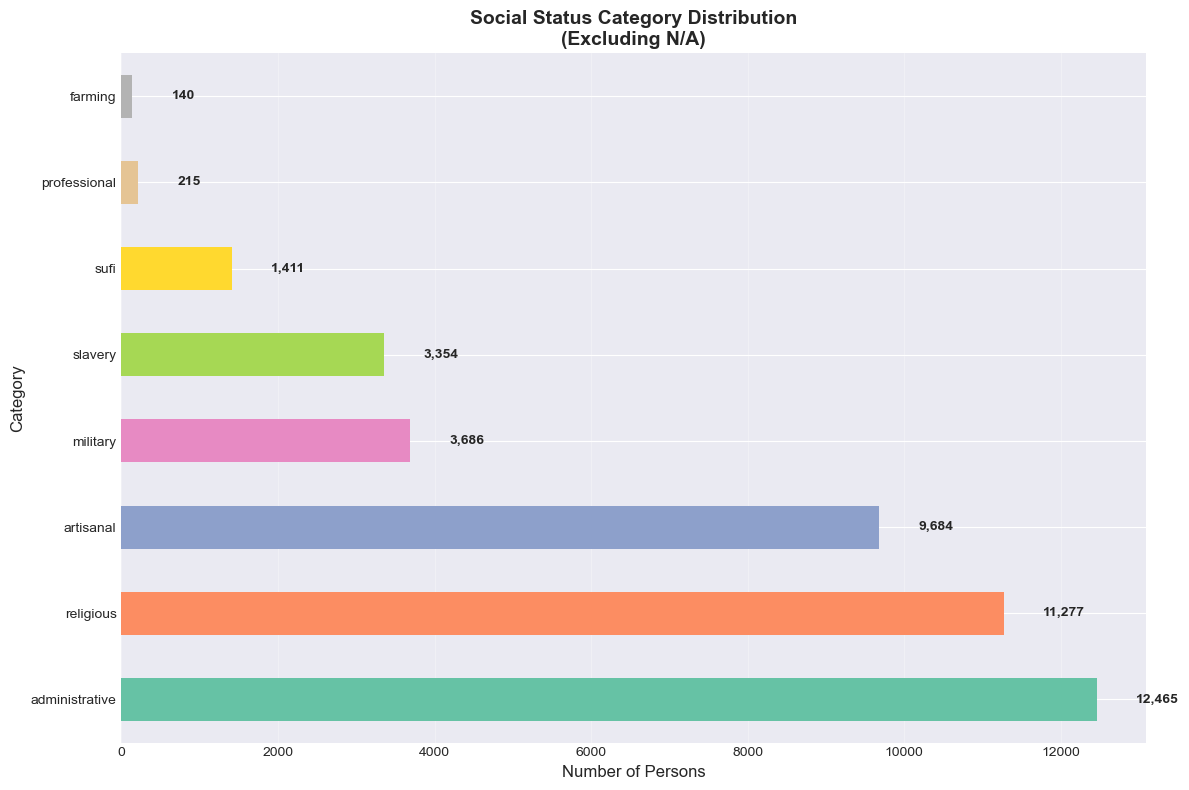

In [77]:
# Filter for PERSONS ONLY first
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
].copy()

print(f"Total person records: {len(persons_df):,}")

# Now get the social status distribution from persons only
category_counts = persons_df['cleaned_social_status'].value_counts()
category_counts_no_na = category_counts[category_counts.index != 'N/A']

# Calculate percentages
total_persons = len(persons_df[persons_df['cleaned_social_status'] != 'N/A'])
category_pct = (category_counts_no_na / total_persons * 100).round(2)

# Print summary
print("\nSocial Status Distribution (Excluding N/A):")
print("=" * 60)
for i, (category, count) in enumerate(category_counts_no_na.items(), 1):
    pct = category_pct[category]
    print(f"{i:2d}. {category:20s}: {count:>8,} ({pct:>5.2f}%)")

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 8))

colors = sns.color_palette("Set2", len(category_counts_no_na))
category_counts_no_na.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Social Status Category Distribution\n(Excluding N/A)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Persons', fontsize=12)
ax.set_ylabel('Category', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(category_counts_no_na):
    ax.text(v + 500, i, f'{v:,}', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('social_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Total person records: 256,270


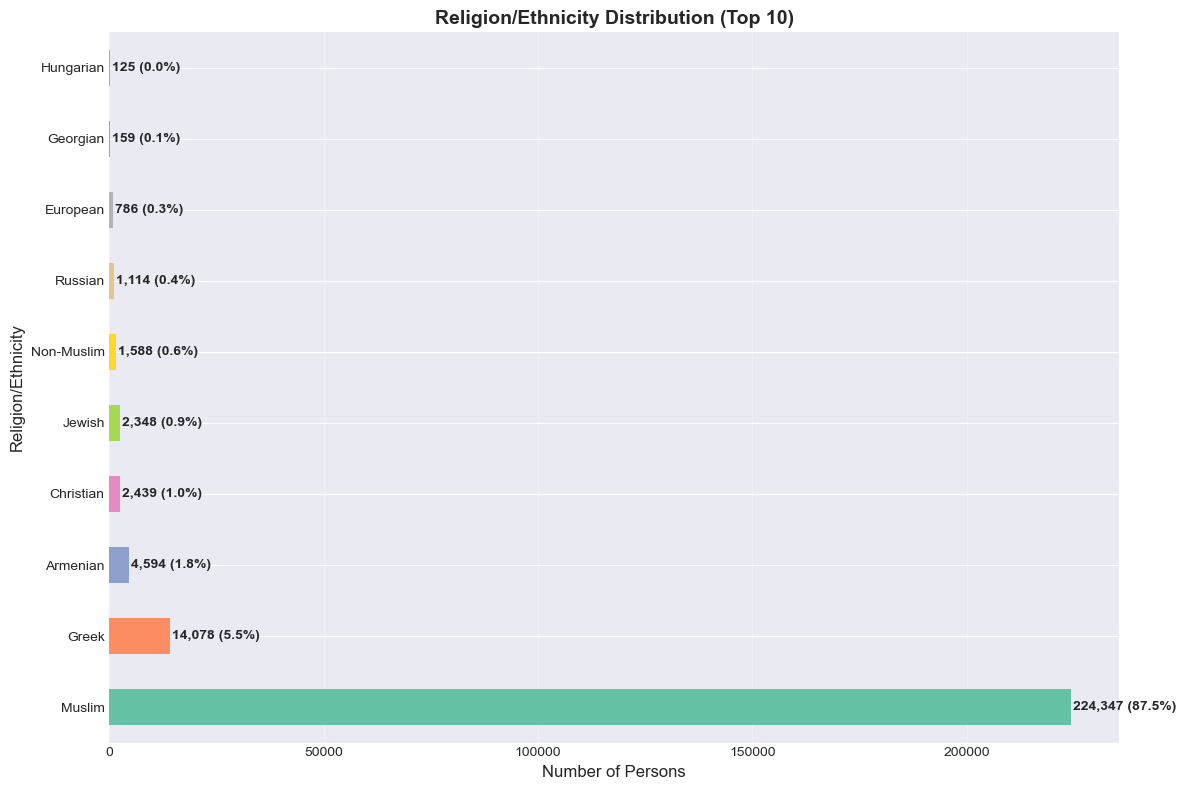


RELIGION/ETHNICITY DISTRIBUTION (Top 10)
 1. Muslim                   :  224,347 ( 87.5%)
 2. Greek                    :   14,078 (  5.5%)
 3. Armenian                 :    4,594 (  1.8%)
 4. Christian                :    2,439 (  1.0%)
 5. Jewish                   :    2,348 (  0.9%)
 6. Non-Muslim               :    1,588 (  0.6%)
 7. Russian                  :    1,114 (  0.4%)
 8. European                 :      786 (  0.3%)
 9. Georgian                 :      159 (  0.1%)
10. Hungarian                :      125 (  0.0%)


In [79]:
# Filter for persons only
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
].copy()

print(f"Total person records: {len(persons_df):,}")

# Religion/Ethnicity Distribution (Top 10)
religion_counts = persons_df['religion_ethnicity'].value_counts().head(10)
colors_religion = sns.color_palette("Set2", len(religion_counts))

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

religion_counts.plot(kind='barh', ax=ax, color=colors_religion)
ax.set_title('Religion/Ethnicity Distribution (Top 10)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Persons', fontsize=12)
ax.set_ylabel('Religion/Ethnicity', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels and percentages
for i, v in enumerate(religion_counts.values):
    pct = (v / len(persons_df) * 100)
    ax.text(v + 500, i, f'{v:,} ({pct:.1f}%)', 
            va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('ethnic_composition.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "=" * 80)
print("RELIGION/ETHNICITY DISTRIBUTION (Top 10)")
print("=" * 80)
for i, (religion, count) in enumerate(religion_counts.items(), 1):
    pct = (count / len(persons_df) * 100)
    print(f"{i:2d}. {religion:<25s}: {count:>8,} ({pct:>5.1f}%)")


Category distribution for top 5 religion/ethnicity groups:
religion_ethnicity     Armenian  European  Greek  Muslim  Russian
cleaned_social_status                                            
administrative               11       110     63   12117        0
artisanal                   630        65   1416    6738       12
farming                       5         0     61      55        0
military                      0        22     12    3592        0
professional                  0         0      1     214        0
religious                    32         0    233   10957        0
slavery                       6       414     19     795     1095
sufi                          0         0      2    1408        0


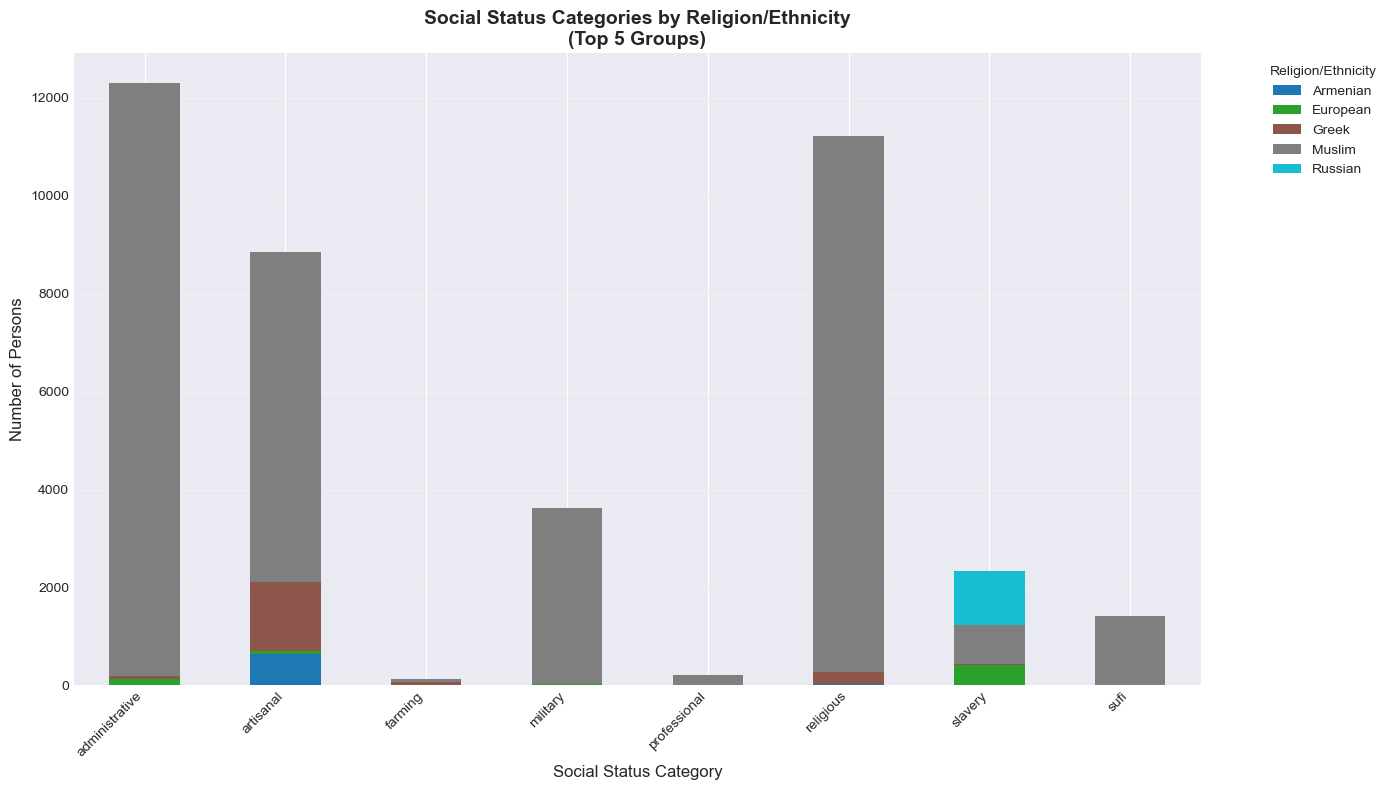

In [80]:
# Filter for persons with specified social status
persons_specified = persons_df[persons_df['cleaned_social_status'] != 'N/A'].copy()

# Top 5 religions
top_religions = persons_specified['religion_ethnicity'].value_counts().head(5).index
persons_top_religions = persons_specified[
    persons_specified['religion_ethnicity'].isin(top_religions)
]

# Crosstab
religion_category = pd.crosstab(
    persons_top_religions['cleaned_social_status'],
    persons_top_religions['religion_ethnicity']
)

print("\nCategory distribution for top 5 religion/ethnicity groups:")
print(religion_category)

# Visualization - Stacked bar
fig, ax = plt.subplots(figsize=(14, 8))

religion_category.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
ax.set_title('Social Status Categories by Religion/Ethnicity\n(Top 5 Groups)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Social Status Category', fontsize=12)
ax.set_ylabel('Number of Persons', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Religion/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('social_status_by_religion.png', dpi=300, bbox_inches='tight')
plt.show()


LEGAL CASE TYPES INVOLVING SUFIS

Total cases involving Sufis: 1,023

Different case types: 21

Top 20 most common case types:
 1. Property Disputes                                 :   325 (31.16%)
 2. Religious Endowments (Waqf)                       :   204 (19.56%)
 3. Inheritance Cases                                 :   156 (14.96%)
 4. Debt/Loan Agreements                              :   153 (14.67%)
 5. Slavery and Manumission                           :    65 ( 6.23%)
 6. Criminal Cases                                    :    60 ( 5.75%)
 7. Marital Disputes                                  :    28 ( 2.68%)
 8. Trade Disputes                                    :    20 ( 1.92%)
 9. Appointments                                      :    10 ( 0.96%)
10. Taxation Disputes                                 :     4 ( 0.38%)
11. Settlement                                        :     3 ( 0.29%)
12. Pilgrimage Arrangements                           :     3 ( 0.29%)
13. Employment Dispu

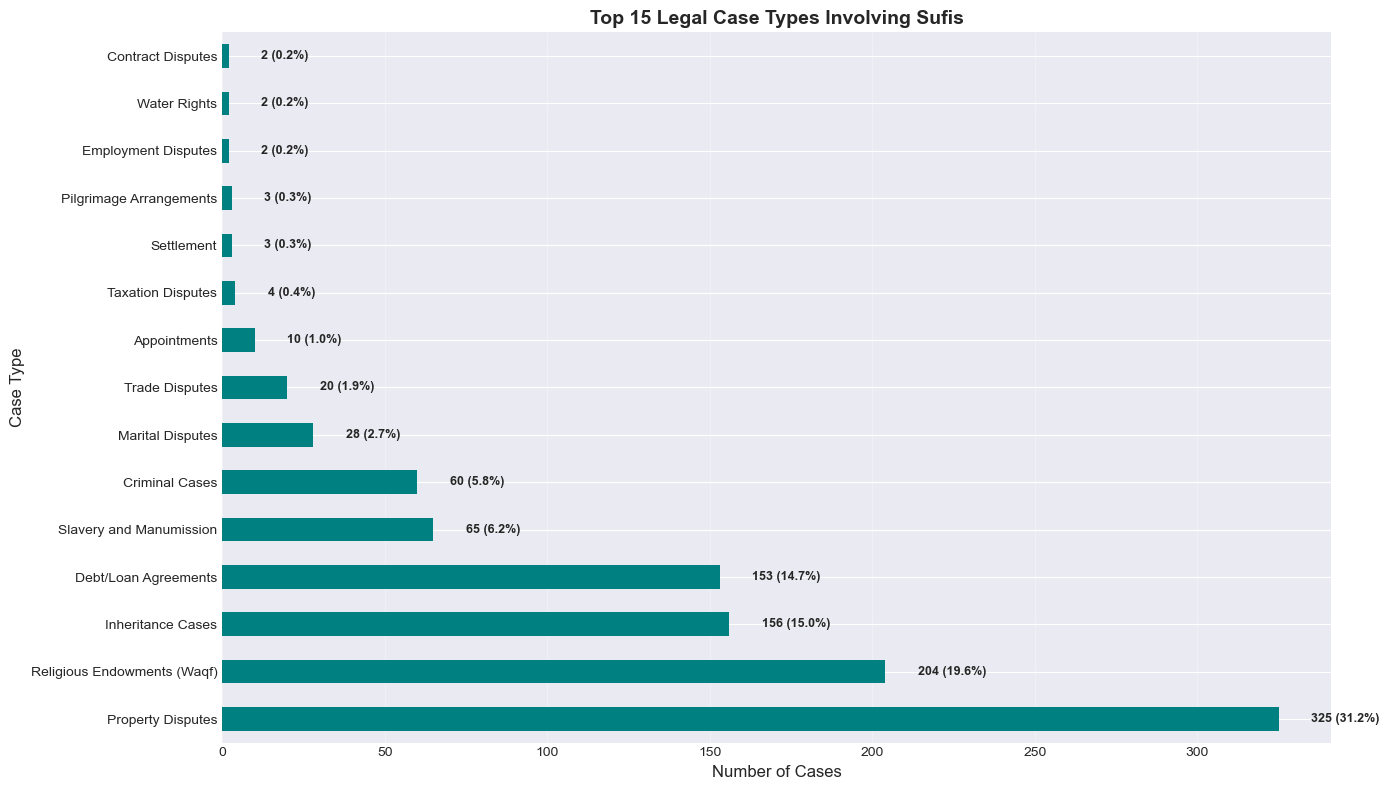

In [85]:
print("\n" + "=" * 80)
print("LEGAL CASE TYPES INVOLVING SUFIS")
print("=" * 80)

persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
].copy()

# Identify Sufis
sufis_df = persons_df[persons_df['cleaned_social_status'] == 'sufi'].copy()

# Get unique case IDs involving Sufis (DEFINE THIS FIRST!)
sufi_case_ids = sufis_df['case_unique_id'].unique()

print(f"\nTotal cases involving Sufis: {len(sufi_case_ids):,}")

# Get legal case types for Sufi cases
sufi_cases = combined_df[
    (combined_df['case_unique_id'].isin(sufi_case_ids)) &
    (combined_df['legal_case_type'].notna()) &
    (combined_df['legal_case_type'] != 'N/A')
]

case_type_dist = sufi_cases['legal_case_type'].value_counts()
print(f"\nDifferent case types: {len(case_type_dist)}")
print(f"\nTop 20 most common case types:")

for i, (case_type, count) in enumerate(case_type_dist.head(20).items(), 1):
    pct = (count / len(sufi_cases) * 100)
    print(f"{i:2d}. {case_type:50s}: {count:>5,} ({pct:>5.2f}%)")

# Case results
print("\nCase results:")
result_dist = sufi_cases[sufi_cases['case_result'] != 'N/A']['case_result'].value_counts()
for result, count in result_dist.head(10).items():
    print(f"  {result}: {count:,}")

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))

top_case_types = case_type_dist.head(15)
top_case_types.plot(kind='barh', ax=ax, color='teal')
ax.set_title('Top 15 Legal Case Types Involving Sufis', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Cases', fontsize=12)
ax.set_ylabel('Case Type', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_case_types.values):
    pct = (v / len(sufi_cases) * 100)
    ax.text(v + 10, i, f'{v:,} ({pct:.1f}%)', 
            va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('sufi_case_types.png', dpi=300, bbox_inches='tight')
plt.show()


Top 10 Sufi roles in cases:
 1. Witness                  :    922 ( 65.3%)
 2. Defendant                :     55 (  3.9%)
 3. Plaintiff                :     53 (  3.8%)
 4. Neighbor                 :     35 (  2.5%)
 5. Buyer                    :     18 (  1.3%)
 6. Debtor                   :     17 (  1.2%)
 7. Beneficiary              :     15 (  1.1%)
 8. Şuhûdü’l-hâl             :     15 (  1.1%)
 9. Deceased                 :     14 (  1.0%)
10. Recipient                :     10 (  0.7%)


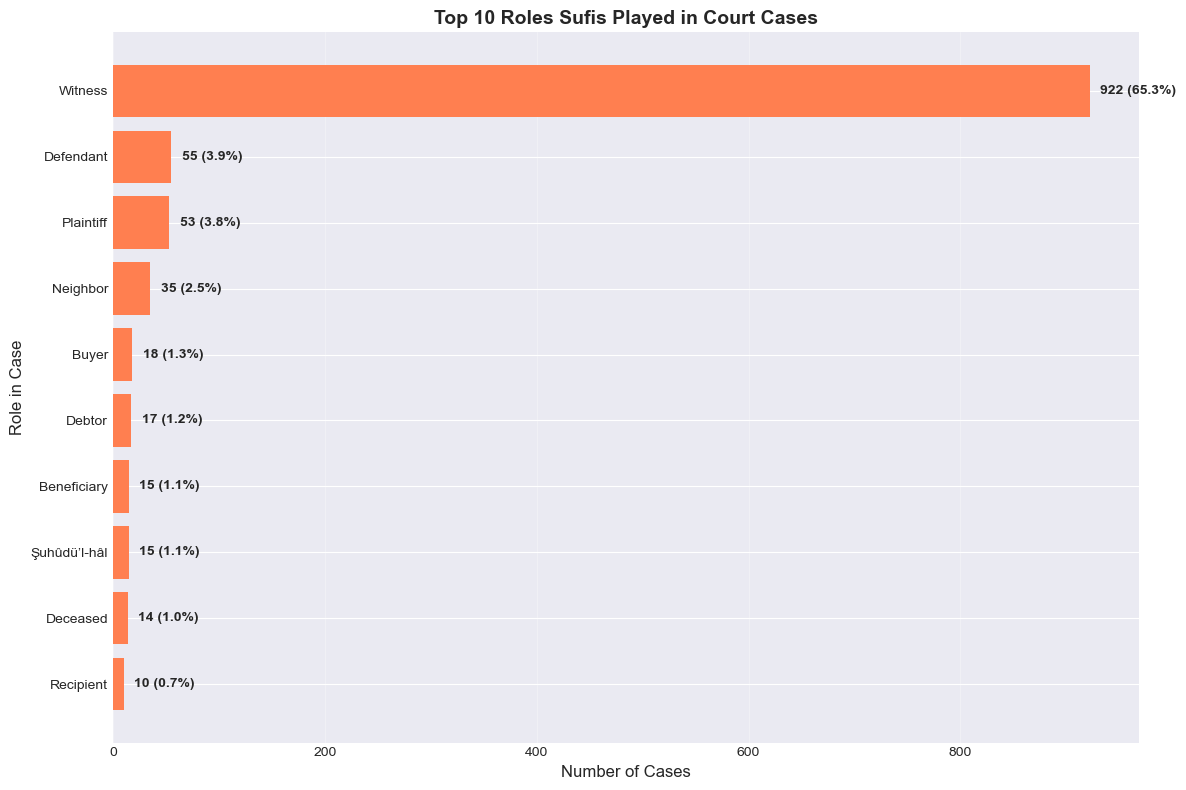

In [88]:
# Get top 10 roles
role_counts = sufis_df['role_in_case'].value_counts().head(10)

print("\nTop 10 Sufi roles in cases:")
for i, (role, count) in enumerate(role_counts.items(), 1):
    pct = (count / len(sufis_df) * 100)
    print(f"{i:2d}. {role:<25s}: {count:>6,} ({pct:>5.1f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(range(len(role_counts)), role_counts.values, color='coral')
ax.set_yticks(range(len(role_counts)))
ax.set_yticklabels(role_counts.index)
ax.invert_yaxis()
ax.set_title('Top 10 Roles Sufis Played in Court Cases', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Cases', fontsize=12)
ax.set_ylabel('Role in Case', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(role_counts.values):
    pct = (v / len(sufis_df) * 100)
    ax.text(v + 10, i, f'{v:,} ({pct:.1f}%)', 
            va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('sufi_roles_top10.png', dpi=300, bbox_inches='tight')
plt.show()